In [41]:
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import PorterStemmer
import pandas as pd
from wordcloud import STOPWORDS,WordCloud
import re

In [2]:
stemmer = PorterStemmer()

In [3]:
def get_stem_word(text: str) -> str:
    
    stemmed_words = []
    sent_list = text.split()
    
    for word in sent_list:
        try:
            stemmed_words.append(stemmer.stem(word)) 
        except:
             stemmed_words.append(word)
    return ' '.join(stemmed_words)

In [17]:
df = pd.read_csv('cleaned_fintech_data.csv')

In [28]:
# df.polarity.astype(float)

In [26]:
df.isna().sum()

Unnamed: 0                   1
created_at                   0
source                       0
original_text                0
clean_text                   4
sentiment                    0
polarity                     0
subjectivity                 0
lang                         0
favorite_count               0
retweet_count                0
original_author              0
screen_count                 0
followers_count              0
friends_count                0
possibly_sensitive        5490
hashtags                  4808
user_mentions                0
place                     5620
place_coord_boundaries    2018
timestamp                    0
dtype: int64

In [ ]:
df.polarity.astype()

In [8]:
# inspecting the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5620 non-null   float64
 1   created_at              5621 non-null   object 
 2   source                  5621 non-null   object 
 3   original_text           5621 non-null   object 
 4   clean_text              5617 non-null   object 
 5   sentiment               5621 non-null   object 
 6   polarity                5621 non-null   object 
 7   subjectivity            5621 non-null   object 
 8   lang                    5621 non-null   object 
 9   favorite_count          5621 non-null   object 
 10  retweet_count           5621 non-null   object 
 11  original_author         5621 non-null   object 
 12  screen_count            5621 non-null   object 
 13  followers_count         5621 non-null   object 
 14  friends_count           5621 non-null   

In [34]:
# Filling NaN using mode
df['hashtags'].fillna(df['hashtags'].mode()[0],inplace=True)
df['place_coord_boundaries'].fillna(df['place_coord_boundaries'].mode()[0],inplace=True)
df['possibly_sensitive'].fillna(df['possibly_sensitive'].mode()[0],inplace=True)

In [36]:
# explore if there are another languages
df['lang'].value_counts()

en      3408
et      1152
in       572
tl       116
es        68
fi        50
fr        46
ht        42
it        36
hi        34
und       32
ja        28
pl        16
pt         6
de         4
tr         4
nl         4
no         2
lang       1
Name: lang, dtype: int64

In [37]:
# drop all rows having language different from english
df = df.drop(df[df['lang'] != 'en'].index)

In [45]:
# creating cleanedTweet dataframe
cleanedTweet = pd.DataFrame(columns=['clean_text','polarity'])
cleanedTweet['clean_text'] = df['original_text']
cleanedTweet['polarity'] = df['polarity']
cleanedTweet.dropna(inplace=True)

In [46]:
# replacing hastags, username starting by @ and links
def clean_text(text):
    hashtag_removed = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', text)
    removed_links = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)
    cleaned = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', removed_links)
    return cleaned

In [47]:
# cleaning and inspecting the whole dataframe
cleanedTweet['clean_text'] = cleanedTweet['clean_text'].apply(clean_text)
cleanedTweet

,clean_text,polarity
0,Giving forth life is becoming a burden in Keny...,0.319444
3,Today is World Day to Combat #Desertification ...,0.250000
4,Hearing #GregHunt say he's confident vaccines ...,0.500000
5,Buy airtime across all networks from Mpesa eve...,0.000000
6,Today is World Day to Combat #Desertification ...,0.250000
...,...,...
5613,"Join webinar on ""Carbon Credits from Waste Ma...",-0.200000
5615,In the latest episode of ’s #CarbonSmart podca...,0.279167
5616,"Lambie has voted AGAINST Medivac, Carbon tax, ...",0.136364
5618,welkin moon giveaway bc i finally have money!\...,0.154167


In [48]:
df['polarity'].value_counts()

 0.000000    848
-0.100000    208
 0.136364    196
 0.154167    144
 0.400000    110
            ... 
 0.275000      2
-0.279167      2
 0.568182      2
-0.121212      2
 0.279167      2
Name: polarity, Length: 230, dtype: int64

In [49]:
# checking if there are null values
text_null_sum = df['clean_text'].isnull().sum()
polarity_null_sum = df['polarity'].isnull().sum()

print(f'sum of null values in clean_text column: {text_null_sum}')
print(f'sum of null values in polarity cloumn: {polarity_null_sum}')

sum of null values in clean_text column: 0
sum of null values in polarity cloumn: 0


Data Preparation

In [50]:
df.polarity = df.polarity.astype(float)

In [51]:
# takes polarity and returns a string either postive, negative or neutral

def text_category(p: float) -> str:
    if float(p) > 0:
        return "positive"
    elif float(p) == 0:
        return "neutral"
    else:
        return "negative"

In [52]:
# creating score column by applying text_category
cleanedTweet['score'] = cleanedTweet['polarity'].apply(text_category)
cleanedTweet['score'].value_counts()

positive    1960
neutral      848
negative     600
Name: score, dtype: int64

In [68]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

<AxesSubplot:title={'center':'score'}>

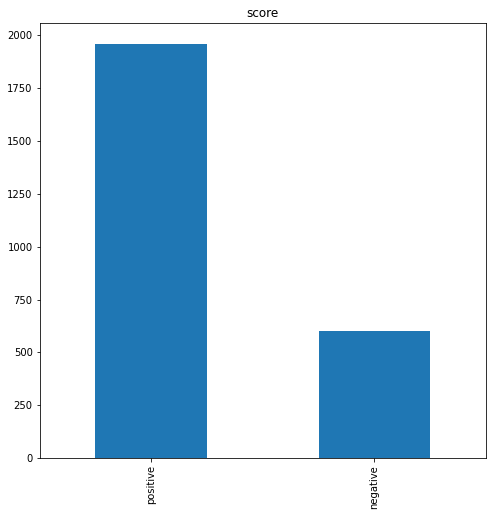

In [69]:
# Grouping the scores and plotting bar graph
score_count =  cleanedTweet['score'].value_counts()
score_count.plot(kind="bar", y="score", title="score", figsize=[8, 8])

<AxesSubplot:title={'center':'score'}, ylabel='score'>

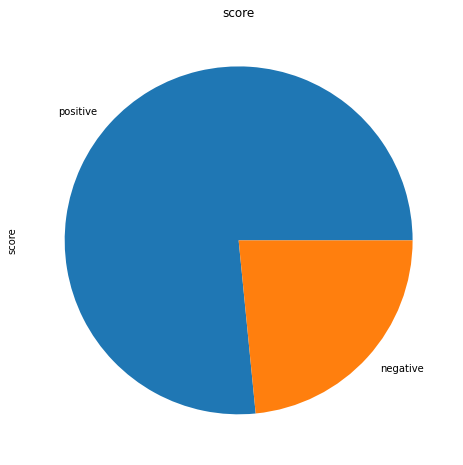

In [70]:
score_count.plot(kind="pie", y="score", title="score", x="", figsize=[8, 8])

In [71]:
# takes a string and returns if a value is "neutral"
def remove_neutral(value):
    return value != "neutral"

In [72]:
cleanedTweet = cleanedTweet[cleanedTweet['score'].map(remove_neutral)]
cleanedTweet['score_map'] = cleanedTweet["score"].map( lambda score: 1 if score == "positive" else 0)

In [73]:
# transforming clean_tex bygetting the root word of clean_text words using Stemming
cleanedTweet['clean_text'] = cleanedTweet['clean_text'].apply(get_stem_word)

In [74]:
# splitting into input and output
(X, y) = cleanedTweet['clean_text'], cleanedTweet['score_map']

In [75]:
# creating CountVectorizer and fitting it
trigram_vectorizer = CountVectorizer(ngram_range=(1, 3))
trigram_vectorizer.fit(X.values)

CountVectorizer(ngram_range=(1, 3))

In [76]:
# creating a tri_gram Vector representation for X
X_trigram = trigram_vectorizer.transform(X.values)

In [77]:
# creating a trigram tfidf transformer
trigram_tf_idf_transformer = TfidfTransformer()
trigram_tf_idf_transformer.fit(X_trigram)

TfidfTransformer()

In [78]:
# creating a tfidf representation of x
X_train_tf_idf = trigram_tf_idf_transformer.transform(X_trigram)

In [93]:
def train_and_show_scores(X, y, title: str) -> None:
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=0.75, stratify=y
    )

    clf = SGDClassifier()
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    valid_score = clf.score(X_valid, y_valid)
    print(f'{title}\nTrain score: {round(train_score, 2)} ; Validation score: {round(valid_score, 2)}\n')

In [94]:
train_and_show_scores(X_trigram, y, title="trigram")

trigram
Train score: 1.0 ; Validation score: 0.99



In [95]:
train_and_show_scores(X_train_tf_idf, y, title="trigram_tf_idf")

trigram_tf_idf
Train score: 1.0 ; Validation score: 0.99



In [99]:
from sklearn.ensemble import RandomForestClassifier
def train_and_show_scores1(X, y, title: str) -> None:
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=0.75, stratify=y
    )

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    valid_score = clf.score(X_valid, y_valid)
    print(f'{title}\nTrain score: {round(train_score, 2)} ; Validation score: {round(valid_score, 2)}\n')

In [100]:
train_and_show_scores1(X_trigram, y, title="trigram")

trigram
Train score: 1.0 ; Validation score: 1.0



In [101]:
train_and_show_scores1(X_train_tf_idf, y, title="trigram_tf_idf")

trigram_tf_idf
Train score: 1.0 ; Validation score: 0.99



Topic Modelling

In [5]:
# !pip3 install pyLDAvis

In [8]:
import string
import gensim
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

In [9]:
# it removes stop words
def rem_stopwords(sent: str) -> str:
    sent_list = sent.split()
    return ' '.join([word for word in sent_list if word not in STOPWORDS])

In [19]:
import pandas as pd
class TopicModel:
    def __init__(self, tweet_df: pd.DataFrame, num_of_topics: int, do_stemming = False):
        self.df = tweet_df
        self.num_of_topics = num_of_topics
        self.do_stemming = do_stemming

    def extract_text_df(self):
        self.df = pd.DataFrame(self.df['clean_text']) 
        return self.df
    
    def further_pre_process(self):
        
        self.df['clean_text']= df['clean_text'].apply(lambda x: str(x).translate(str.maketrans(' ', ' ', string.punctuation))) 
        
        self.df['clean_text'] = self.df['clean_text'].apply(rem_stopwords)
        
        return self.df
    
    def prepare_inputs(self, stemming=False):
        
        df = self.extract_text_df()
        df = self.further_pre_process()
        
        sentence_list = [text for text in self.df['clean_text']]
        
        if (stemming):      
            sentence_list = [get_stem_word(sentence) for sentence in sentence_list]
        
        word_list = [sent.split() for sent in sentence_list]
        word_to_int = corpora.Dictionary(word_list)
        
        corpus = [word_to_int.doc2bow(tweet) for tweet in word_list]
        
        return word_list, word_to_int, corpus
    
    def lda_prepared(self, lda_model, corpus,  word_list):
        pyLDAvis.enable_notebook()
        LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, word_list)
        return LDAvis_prepared
        
    def build(self, show_print=False):
        word_list, word_to_int, corpus = self.prepare_inputs(self.do_stemming)
        
        lda_model = gensim.models.ldamodel.LdaModel(
            corpus, id2word=word_to_int,num_topics=self.num_of_topics, 
            random_state=100, update_every=1, 
            chunksize=100, passes=10, alpha='auto',
            per_word_topics=True
        )
        lda_prepared = self.lda_prepared(lda_model, corpus, word_to_int)
        
        if show_print:
            pprint(lda_model.print_topics())
        
        return lda_model, lda_prepared

In [21]:
topicmodel = TopicModel(df, 8)
# lda_model, lda_prepared =topicmodel.build(show_print=True)